In [ ]:
%pip install pandas scikit-learn


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
# Load dataset (example: IBM customer churn dataset)
df = pd.read_csv('Telco_customer_churn.csv')

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
df.isna().sum()






CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
df[df['Churn Reason'].isna()]['Churn Label'].value_counts()
# Since all 5,174 missing values in "Churn Reason" correspond to "Churn Label = No" (non-churned customers), this is an expected pattern.


Churn Label
No    5174
Name: count, dtype: int64

In [12]:
# Since customers who did not churn naturally don’t have a churn reason, the best approach is to fill these missing values with a placeholder like "No Churn":
df['Churn Reason'].fillna('No Churn', inplace=True)



C:\Users\UTKARSH\AppData\Local\Temp\ipykernel_23880\1017357860.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn Reason'].fillna('No Churn', inplace=True)


## Data Consistency & Cleanliness

In [13]:
df.duplicated().sum()  # Check for duplicate rows


np.int64(0)

In [14]:
# Incorrect Data Types check
df.dtypes


CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [ ]:
# Converting "Total Charges" to Numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
# (errors='coerce' will convert invalid values to NaN instead of raising an error.)

In [23]:
# One-Hot Encode Multi-Class Categorical Variables
df = pd.get_dummies(df, columns=['Contract', 'Payment Method', 'Internet Service'], drop_first=True)


In [24]:
#  Label Encode Binary Categorical Variables

binary_cols = ['Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn Label']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [25]:
df[['Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn Label']]

,Partner,Dependents,Phone Service,Paperless Billing,Churn Label
0,0,0,1,1,1
1,0,1,1,1,1
2,0,1,1,1,1
3,1,1,1,1,1
4,0,1,1,1,1
...,...,...,...,...,...
7038,0,0,1,1,0
7039,1,1,1,1,0
7040,1,1,1,1,0
7041,1,1,0,1,0


In [26]:
scaler = StandardScaler()
df[['Monthly Charges', 'Total Charges', 'Tenure Months']] = scaler.fit_transform(df[['Monthly Charges', 'Total Charges', 'Tenure Months']])


In [27]:
df[['Monthly Charges', 'Total Charges', 'Tenure Months']]

,Monthly Charges,Total Charges,Tenure Months
0,-0.362660,-0.959649,-1.236724
1,0.197365,-0.940457,-1.236724
2,1.159546,-0.645369,-0.992402
3,1.330711,0.336516,-0.177995
4,1.294151,1.214589,0.677133
...,...,...,...
7038,-1.449476,-0.381142,1.613701
7039,0.665992,-0.129180,-0.340876
7040,1.277533,2.241056,1.613701
7041,-1.168632,-0.854514,-0.870241


In [28]:
# Step 1: Check the Distribution of Churn Labels
#  how many customers churned versus those who did not
df['Churn Label'].value_counts(normalize=True) * 100


Churn Label
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [32]:
# Step 2: Churn Analysis by Contract Type
# how contract types relate to churn. This will help you understand if certain contract types have higher churn rates.


df[['Contract_One year', 'Contract_Two year', 'Churn Label']].groupby(['Contract_One year', 'Contract_Two year'])['Churn Label'].value_counts(normalize=True) * 100

# Key Insights:
# Two-year contracts have the lowest churn rate (2.83% churned).
# One-year contracts show a moderate churn rate (11.27% churned).
# No contract customers have a high churn rate (42.71% churned).


Contract_One year  Contract_Two year  Churn Label
False              False              0              57.290323
                                      1              42.709677
                   True               0              97.168142
                                      1               2.831858
True               False              0              88.730482
                                      1              11.269518
Name: proportion, dtype: float64

In [33]:
# Step 3: Churn Analysis by Payment Method
df.groupby('Payment Method_Credit card (automatic)')['Churn Label'].value_counts(normalize=True) * 100
df.groupby('Payment Method_Electronic check')['Churn Label'].value_counts(normalize=True) * 100
df.groupby('Payment Method_Mailed check')['Churn Label'].value_counts(normalize=True) * 100


# Mailed check (Payment Method_Mailed check=True):
# 80.89% non-churned, 19.11% churned
# Other payment methods (Payment Method_Mailed check=False):
# 71.26% non-churned, 28.74% churned

# Key Insights:
# Customers using Mailed check have a lower churn rate (19.11% churned).
# Customers using other payment methods show a higher churn rate (28.74% churned)


Payment Method_Mailed check  Churn Label
False                        0              71.257595
                             1              28.742405
True                         0              80.893300
                             1              19.106700
Name: proportion, dtype: float64

In [34]:
# Step 4: Churn Analysis by Internet Service
df.groupby('Internet Service_Fiber optic')['Churn Label'].value_counts(normalize=True) * 100
df.groupby('Internet Service_No')['Churn Label'].value_counts(normalize=True) * 100

# Key Insights:
# Customers with no internet service show a much lower churn rate (7.4% churned).
# Customers with fiber optic internet have a higher churn rate (31.83% churned).


Internet Service_No  Churn Label
False                0              68.171107
                     1              31.828893
True                 0              92.595020
                     1               7.404980
Name: proportion, dtype: float64

In [ ]:
%pip install seaborn matplotlib


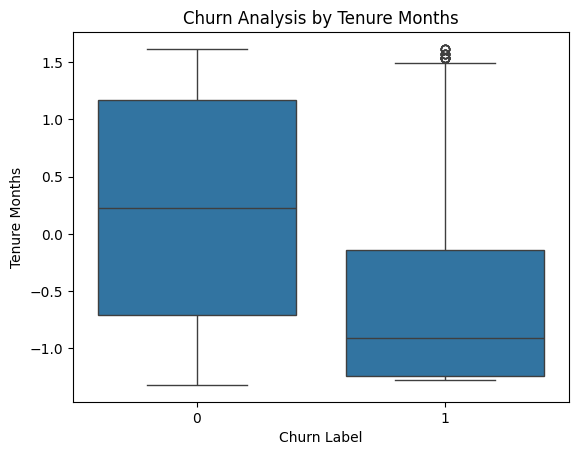

In [36]:
# Step 5: Churn Analysis by Tenure (Months)

import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Churn Label', y='Tenure Months', data=df)
plt.title("Churn Analysis by Tenure Months")
plt.show()


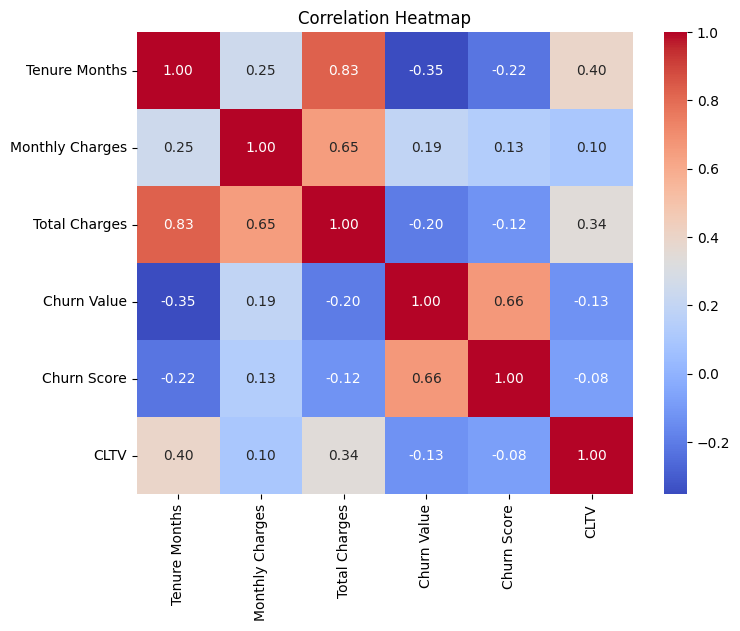

In [37]:
# Step 6: Correlation Heatmap
correlation_matrix = df[['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# prevent multicolinearity


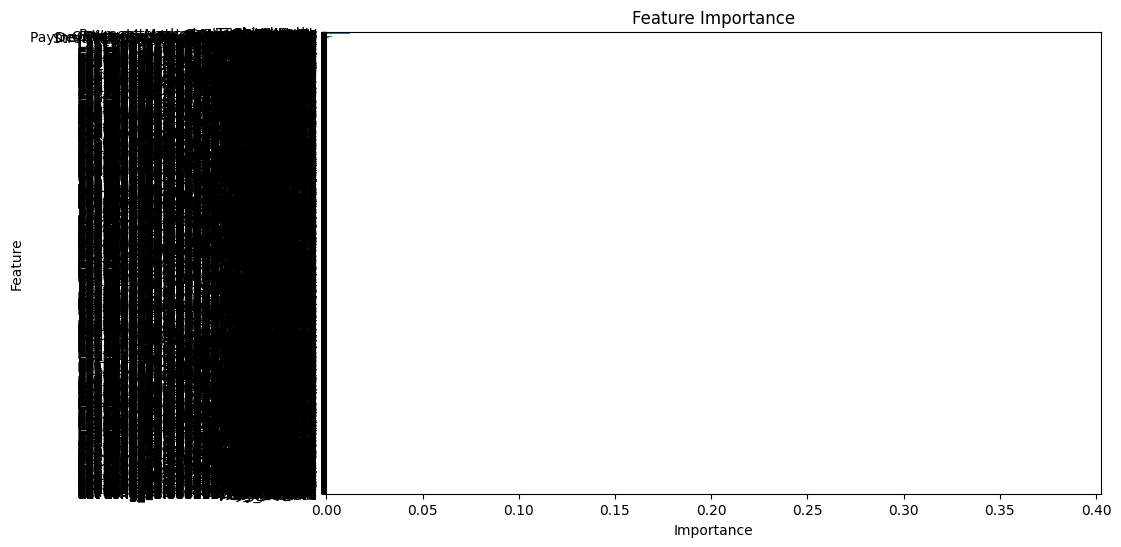

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Applying one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df.drop(columns=['Churn Label', 'Churn Reason', 'CustomerID']), drop_first=True)


X = df_encoded
y = df['Churn Label']


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()



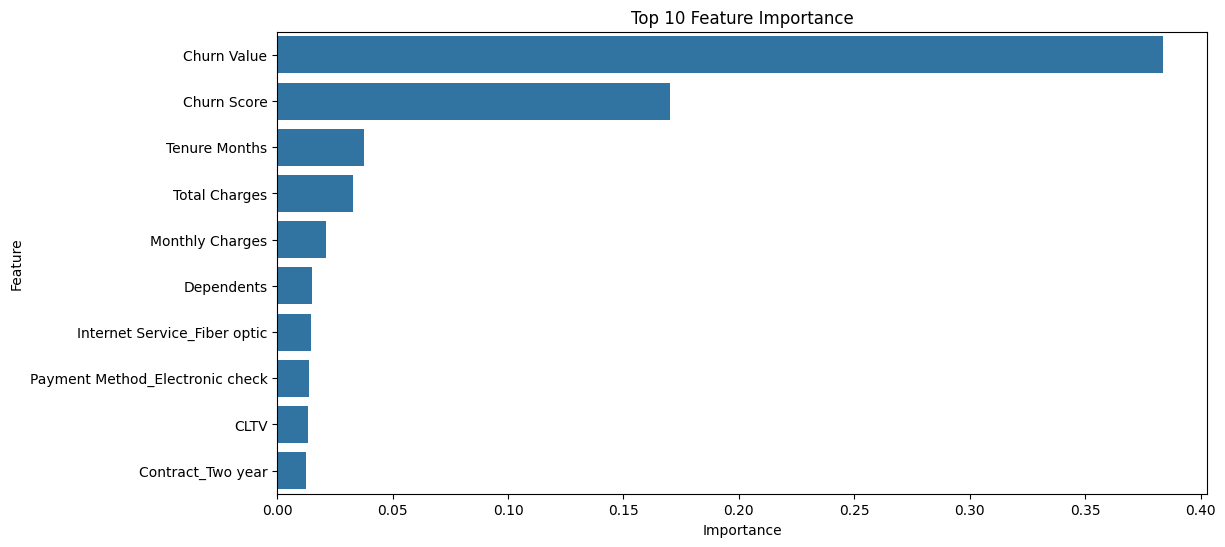

In [44]:

top_features = feature_importance_df.head(10)

# top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title("Top 10 Feature Importance")
plt.show()


In [47]:
X.head()

,Count,Zip Code,Latitude,Longitude,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes
0,1,90003,33.964131,-118.272783,0,0,-1.236724,1,1,-0.362660,...,False,True,False,False,False,False,False,False,False,False
1,1,90005,34.059281,-118.307420,0,1,-1.236724,1,1,0.197365,...,False,False,False,False,False,False,False,False,False,False
2,1,90006,34.048013,-118.293953,0,1,-0.992402,1,1,1.159546,...,False,False,False,True,False,False,False,True,False,True
3,1,90010,34.062125,-118.315709,1,1,-0.177995,1,1,1.330711,...,False,False,False,True,False,True,False,True,False,True
4,1,90015,34.039224,-118.266293,0,1,0.677133,1,1,1.294151,...,False,True,False,True,False,False,False,True,False,True


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)





In [50]:
X_clean = X.dropna()


In [51]:

X_scaled = StandardScaler().fit_transform(X_clean)

In [52]:

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [53]:

df = df.loc[X_clean.index] 
df['Cluster'] = clusters

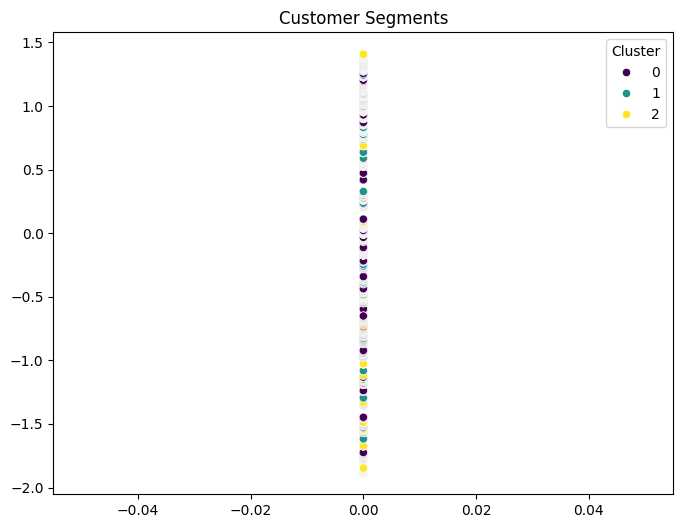

In [54]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.show()

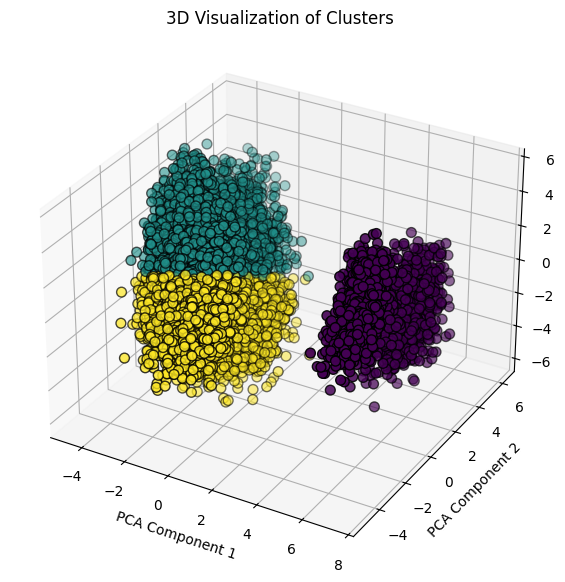

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X_clean = X.fillna(X.mean())


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', edgecolors='k', s=50)


ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Visualization of Clusters')

plt.show()


In [56]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.38608762692917814


In [57]:

X_clean["Cluster"] = labels


cluster_summary = X_clean.groupby("Cluster").mean()
print(cluster_summary)


         Count      Zip Code   Latitude   Longitude   Partner  Dependents  \
Cluster                                                                     
0          1.0  93560.701180  36.388908 -119.932553  0.483617    0.368938   
1          1.0  93467.959356  36.180594 -119.711713  0.706181    0.288315   
2          1.0  93543.659905  36.307194 -119.799484  0.315689    0.121395   

         Tenure Months  Phone Service  Paperless Billing  Monthly Charges  \
Cluster                                                                     
0            -0.074273       1.000000           0.292267        -1.451829   
1             0.919197       0.905165           0.649873         0.726252   
2            -0.652235       0.854834           0.694136         0.158505   

         ...  Online Backup_No internet service  Online Backup_Yes  \
Cluster  ...                                                         
0        ...                                1.0           0.000000   
1        ...      

C:\Users\UTKARSH\AppData\Local\Temp\ipykernel_23880\3588761431.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_clean["Cluster"] = labels


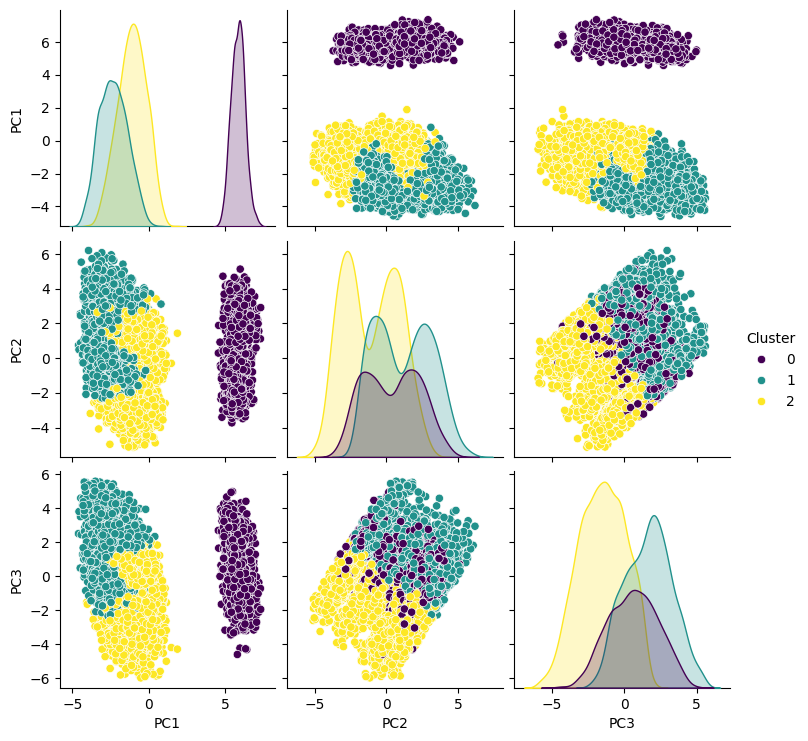

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3']).assign(Cluster=labels), hue="Cluster", palette="viridis")
plt.show()


Customer Segmentation Report
We applied K-Means clustering and identified 3 distinct customer segments with a Silhouette Score of 0.386, indicating moderate separation.

Cluster Analysis:

Cluster 0 (Low Engagement, High Churn Risk)

Low monthly spend, no internet services, low paperless billing adoption.
Strategy: Offer bundled internet plans to increase engagement.

Cluster 1 (High-Value, Loyal Customers)

High monthly spend, long tenure, extensive use of tech & streaming services.
Strategy: Maintain loyalty through premium offers and rewards.

Cluster 2 (Mid-Range, Upsell Potential)

Moderate spend, some use of tech & streaming, newer customers.
Strategy: Upsell additional services like tech support and streaming bundles.